<a href="https://colab.research.google.com/github/ITALOZDKJ/Me-tornando-um-analista-de-dados/blob/main/taesa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
import pandas as pd
import numpy as np
import pandas_datareader as web
import yfinance as yf
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt


In [ ]:
def features_initial(x):
    x.reset_index(inplace=True)
    x['Day'] = x['Date'].dt.day
    x['Month'] = x['Date'].dt.month
    x['Year'] = x['Date'].dt.year
    x['Rentability%'] = round((x['Close']/x['Close'].shift()) * 100 -100, 2)
    x['Rentability pure'] = round(x['Close'] - x['Close'].shift(),3)

def features_cash(x, y, aporte=100):
    x['Action_value'] = (x.loc[:,'High']+ x.loc[:,'Low'])/2
    year_temp = 0
    # 
    for year in list(x['Year'].unique()):
        year_temp = x.loc[(x['Year']==year)]
        for month in list(year_temp['Month'].unique()):
            temp = x.loc[(x['Month'] == month) & (x['Year']==year)]
            day = list(temp[0:]['Day'])
            day = day[0]
            x.loc[(x['Day'] == day) & (x['Month'] == month) & (x['Year'] == year),['Bougth']] = aporte
    # Valor de aporte
    x.loc[:,'Valor_aportado'] = x['Bougth'] * x['Action_value']
    x.fillna(0, inplace=True)
    # A soma das ações
    x['Total_actions'] = 0
    for pos,c in enumerate(x['Bougth']):
        x.loc[pos,'Total_actions'] = x.loc[:pos,'Bougth'].sum()
    
    # A soma do valor investido 
    x['Total_aport'] = 0
    for pos,c in enumerate(x['Total_actions']):
        x.loc[pos,'Total_aport'] = x.loc[:pos,'Valor_aportado'].sum()
        
    # The sum of dividends receives with actual aports
    x['Dividend_receive'] = x['Total_actions'] * x['Dividends']
    
    # The final dividends receives
    x['Total_receive'] = 0
    for pos,c in enumerate(x['Dividend_receive']):
        x.loc[pos,'Total_receive'] = x.loc[:pos,'Dividend_receive'].sum()
    x['My_rentability_pure'] = x['Total_aport'] * x['Rentability%']

def soma(x):
    x['Acumulatted'] = x['Total_aport'] + x['Total_receive'] + x['Rentability pure']

 Import of datas

In [ ]:
ticket = yf.Ticker('TAEE11.SA')
ibov = yf.Ticker('BOVA11.SA')

In [ ]:
taesa = ticket.history(interval='1d',start='2010-01-01', end='2021-11-04')
ibov = ibov.history(interval='1d',start='2010-01-01', end='2021-11-04')

In [ ]:
taesa_a = taesa.copy()

features_initial(taesa_a)
features_initial(ibov)

In [ ]:
features_cash(ibov, ibov)
features_cash(taesa_a, taesa, aporte=10)

In [ ]:
soma(taesa_a)
soma(ibov)

In [ ]:
taesa_a.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Day,Month,Year,Rentability%,Rentability pure,Action_value,Bougth,Valor_aportado,Total_actions,Total_aport,Dividend_receive,Total_receive,My_rentability_pure,Acumulatted
2927,2021-10-27,36.709999,37.430000,36.709999,37.029999,2597400,0.0,0.0,27,10,2021,0.84,0.31,37.070000,0.0,0.000000,1420.0,19492.497888,0.0,20698.29271,16373.698226,40191.100598
2928,2021-10-28,36.779999,37.529999,36.700001,36.730000,2603400,0.0,0.0,28,10,2021,-0.81,-0.30,37.115000,0.0,0.000000,1420.0,19492.497888,0.0,20698.29271,-15788.923289,40190.490598
2929,2021-10-29,37.139999,37.189999,36.650002,36.660000,3020900,0.0,0.0,29,10,2021,-0.19,-0.07,36.920000,0.0,0.000000,1420.0,19492.497888,0.0,20698.29271,-3703.574599,40190.720598
2930,2021-11-01,37.000000,37.259998,36.779999,36.799999,2175900,0.0,0.0,1,11,2021,0.38,0.14,37.019999,10.0,370.199986,1430.0,19862.697874,0.0,20698.29271,7547.825192,40561.130584
2931,2021-11-03,36.720001,37.970001,36.700001,37.540001,3550300,0.0,0.0,3,11,2021,2.01,0.74,37.335001,0.0,0.000000,1430.0,19862.697874,0.0,20698.29271,39924.022726,40561.730584


In [ ]:
dividendos = taesa_a[taesa_a['Dividend_receive'] >0][['Day', 'Month','Year', 'Dividends','Dividend_receive']]

In [ ]:
media_movel200 = taesa_a[taesa_a['Year']>=2017]['Close'].rolling(60).mean()

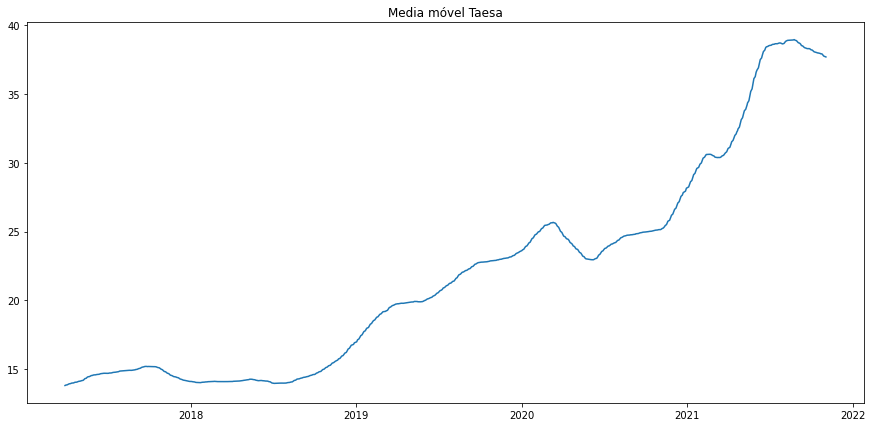

In [ ]:
ax,fig = plt.subplots(figsize=(15,7))
plt.plot( taesa_a[taesa_a['Year']>=2017]['Date'],media_movel200)
plt.title('Media móvel Taesa', loc='center')
plt.show()

In [ ]:
rentabilidade = taesa_a[taesa_a['Year']>=2017]['Rentability%'].rolling(60).mean()

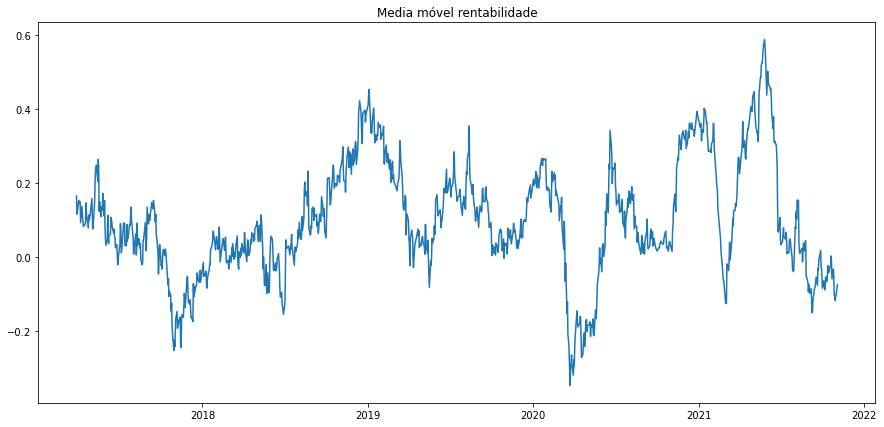

In [ ]:
ax,fig = plt.subplots(figsize=(15,7))
plt.plot( taesa_a[taesa_a['Year']>=2017]['Date'],rentabilidade)
plt.title('Media móvel rentabilidade', loc='center')
plt.show()

In [ ]:
taesa_a.dropna(inplace=True)


In [ ]:
fig = go.Figure(data=[go.Candlestick(x=taesa_a['Date'],
                open= taesa_a['Open'],
                high = taesa_a['High'],
                low = taesa_a['Low'],
                close= taesa_a['Close']
                )])

In [ ]:
fig.show()

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=ibov['Date'],
                open= ibov['Open'],
                high = ibov['High'],
                low = ibov['Low'],
                close= ibov['Close']
                )])

In [ ]:
fig.show()